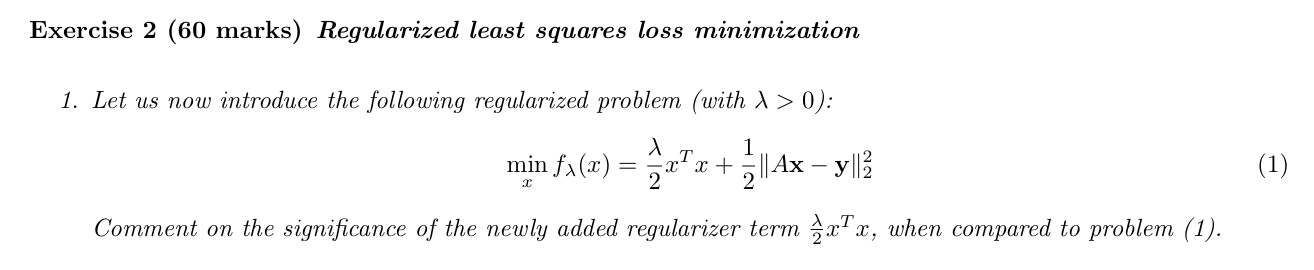

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1000)
#A=np.random.randint(1000,size=(1000,10))
A=np.random.randn(1000,10)
print(A)
x_bar=[]
for i in range(1,np.shape(A)[1]+1):
  if i%2==0:
    x=np.random.uniform(i,i+1)
    x_bar.append(x)
  else :
    x=np.random.uniform(-(i+1),-i)
    x_bar.append(x)
print(x_bar)
epsilon=np.array([np.random.randn() for i in range(1000)])
np.shape(epsilon)
print(np.shape((A@x_bar).tolist()))
epsilon[0:10]
a=(A@x_bar)

y=np.array(a)+epsilon.flatten()

print(y)

[[-0.8044583   0.32093155 -0.02548288 ... -0.47998308  0.5950355
  -0.46466753]
 [ 0.66728131 -0.80611561 -1.19606983 ...  0.70569237  1.27179528
  -0.98674733]
 [-0.33483545 -0.0994817   0.4071921  ... -0.38314741 -0.82294096
   1.60008337]
 ...
 [ 0.4520184  -0.47786694 -1.9209351  ... -0.91576825  1.28648295
   1.96612251]
 [ 1.5847291   1.04574815  1.74030946 ... -0.95352929  0.74063574
   1.35391039]
 [-1.27767888  0.60413859 -0.81028802 ... -0.06434491  0.50570314
  -1.63094421]]
[-1.0625870508289537, 2.9430707164501007, -3.3415055245319243, 4.582526151705519, -5.759475729011791, 6.935124694811037, -7.618930944811743, 8.168181873934037, -9.217996397311051, 10.00022174487319]
(1000,)
[-3.84943546e+00 -1.25706891e+01  3.63121599e+01  3.63405580e+01
  5.55093942e+00 -7.82253463e+00 -1.75872918e+01  2.84011753e+01
  2.21735533e+01  2.11419615e+01 -3.01675507e+01  2.02515788e+01
  6.33261119e+00 -1.14486907e+00  1.83388972e+01 -1.53530539e+01
 -4.56793958e+01  5.72204724e+00  1.423977

The regularizer term $\frac{\lambda}{2} x^T x$in the objective function serves as a regularization technique to control the complexity of the solution in optimization problems. By penalizing the magnitude of the solution vector $x $, the regularizer discourages overly complex models, effectively preventing overfitting by favoring simpler solutions. As the regularization parameter $\lambda$increases, the penalty for large values of $x$strengthens, leading to a stronger preference for smaller parameter values. This regularization term contributes to the bias-variance tradeoff, where increasing $\lambda$increases bias but decreases variance, thus improving the generalization performance of the model. Additionally, regularization enhances numerical stability by constraining parameter values, thereby mitigating potential convergence issues in optimization algorithms. Overall, the regularizer term plays a significant role in improving the robustness and generalization ability of optimization solutions by controlling model complexity and preventing overfitting.

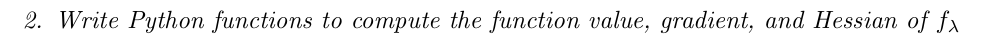

In [3]:
def f(x,A,y, lamda):
  return 0.5*np.linalg.norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_f(x,A,y, lamda):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x

def hessian(x,A,lamda):
  return A.transpose()@A + lamda*np.identity(A.shape[1])

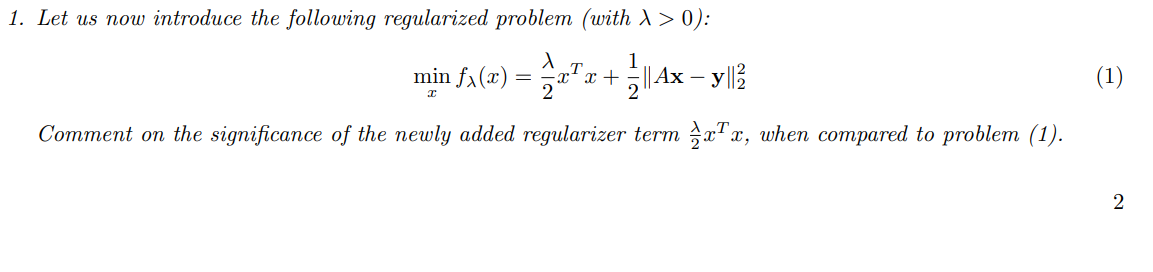

In [25]:
import time

In [27]:
def get_alpha_with_scaling(xk,A,y, rho, Dk,lamda):
  alpha = 0.99
  gamma=0.5
  pk = -grad_f(xk,A,y,lamda)
  while f(xk + alpha*Dk@pk,A,y,lamda) > (f(xk,A,y,lamda) + gamma*alpha*grad_f(xk,A,y,lamda)@Dk@pk):
    alpha = rho*alpha
  return alpha
def newton_method_with_backtrack(x,A,y,tau,lamda):
  k=0
  iteration=[]
  x=np.copy(x)
  tau=1e-4
  optimal_value=[]
  optimizers=[]
  all_x=[]
  rho=0.5
  f_norm=np.linalg.norm(grad_f(x,A,y,lamda))

  while f_norm>tau:
    all_x.append(x)
    Dk=np.linalg.inv(hessian(x,A,lamda))
    alpha=get_alpha_with_scaling(x,A,y,rho,Dk,lamda)
    x=x-alpha*(np.linalg.inv(hessian(x,A,lamda))@grad_f(x,A,y,lamda))
    f_norm=np.linalg.norm(grad_f(x,A,y,lamda))
    #print(x)
    k=k+1
    #print(f_norm)
    all_x.append(x)
  optimizers.append(x)
  optimal_value.append(f(x,A,y,lamda))
  iteration.append(k)
  return iteration,optimal_value,optimizers,all_x\

newtontime_list=[]
lamdalist = [1e-3,1e-2,1e-1,1]

for lamda in lamdalist:
  start = time.time()
  tau=1e-4
  x=[0 for i in range(10)]
  iteration_with_scale,optimal_value_with_scale,optimizers_with_scale,all_x_with_scale=newton_method_with_backtrack(x,A,y,tau,lamda)
  newton_time = time.time() - start
  newtontime_list.append(newton_time)
  print(f'Iteration:{iteration_with_scale}')
  print(f'optimizers:{optimizers_with_scale}')
  print(f' optimal value:{optimal_value_with_scale}')

Iteration:[5]
optimizers:[array([-1.04982182,  2.95189522, -3.34297873,  4.6095547 , -5.71175719,
        6.89876991, -7.62878664,  8.16820415, -9.22220401, 10.05668398])]
 optimal value:[505.8641099144284]
Iteration:[5]
optimizers:[array([-1.04981537,  2.95187528, -3.34295004,  4.60950637, -5.71171441,
        6.8987135 , -7.62872413,  8.16814145, -9.22213214, 10.05660346])]
 optimal value:[507.8151160259465]
Iteration:[5]
optimizers:[array([-1.04975087,  2.95167593, -3.34266312,  4.60902313, -5.71128655,
        6.89814938, -7.62809908,  8.16751449, -9.22141353, 10.05579836])]
 optimal value:[527.3234549553678]
Iteration:[5]
optimizers:[array([-1.04910637,  2.94968385, -3.33979667,  4.60419616, -5.70701144,
        6.89251335, -7.62185432,  8.16125016, -9.2142336 , 10.04775449])]
 optimal value:[722.2347799102849]


In [20]:

def get_alpha_bfgs(xk,A,y, alpha0, rho, gamma, Bk,lamda):
  alpha = alpha0
  pk = -grad_f(xk,A,y,lamda)
  while f(xk + alpha*Bk@pk,A,y,lamda) > (f(xk,A,y,lamda) + gamma*alpha*grad_f(xk,A,y,lamda)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0,A,y, tau, alpha0, rho, gamma, lamda):
  #start_time = time.time()
  max_iter=300
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_f(xk,A,y,lamda)
  xks = []
  xks.append(xk)
  while (np.linalg.norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk,A,y ,alpha0, rho, gamma, Bk,lamda)
    xnext = xk - alpha*(Bk@pk)


    sk = xnext - xk
    yk = grad_f(xnext,A,y,lamda) - grad_f(xk,A,y,lamda)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_f(xk,A,y,lamda)

    xks.append(xk)
    count += 1

  #end_time = time.time()
  #time_elapsed = end_time - start_time
  return count, xk, f(xk,A,y,lamda), xks #time_elapsed
import time
bfgstime_list=[]
lamdalist = [1e-3,1e-2,1e-1,1]
for lamda in lamdalist:
  start = time.time()
  alpha0 = 0.99
  rho = 0.5
  gamma = 0.5
  tau=1e-5
  x0=[i for i in range(10)]
  iteration,minimizers,optimal,all_x=bfgs(x0,A,y,tau, alpha0, rho, gamma,lamda)
  bfgstime = time.time() - start
  bfgstime_list.append(bfgstime)
  print('iteration:',iteration)
  print('minimizers:',minimizers)
  print('optimal_value_of_f:',optimal)

iteration: 18
minimizers: [-1.04982182  2.95189522 -3.34297873  4.6095547  -5.71175719  6.89876991
 -7.62878664  8.16820415 -9.22220401 10.05668398]
optimal_value_of_f: 505.8641099144283
iteration: 18
minimizers: [-1.04981537  2.95187528 -3.34295004  4.60950637 -5.71171441  6.8987135
 -7.62872413  8.16814145 -9.22213214 10.05660346]
optimal_value_of_f: 507.8151160259467
iteration: 18
minimizers: [-1.04975087  2.95167593 -3.34266312  4.60902313 -5.71128655  6.89814939
 -7.62809908  8.16751449 -9.22141353 10.05579836]
optimal_value_of_f: 527.3234549553679
iteration: 18
minimizers: [-1.04910637  2.94968385 -3.33979667  4.60419616 -5.70701144  6.89251335
 -7.62185432  8.16125016 -9.2142336  10.04775449]
optimal_value_of_f: 722.2347799102849


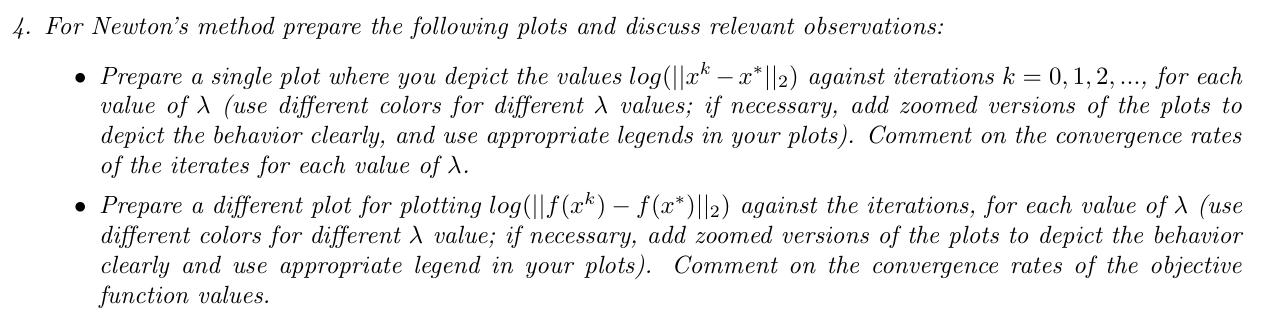

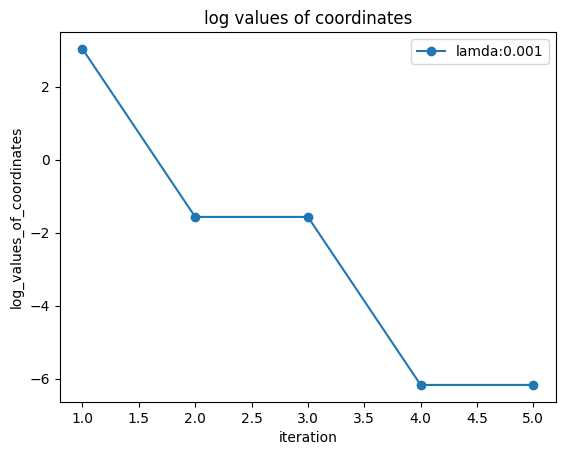

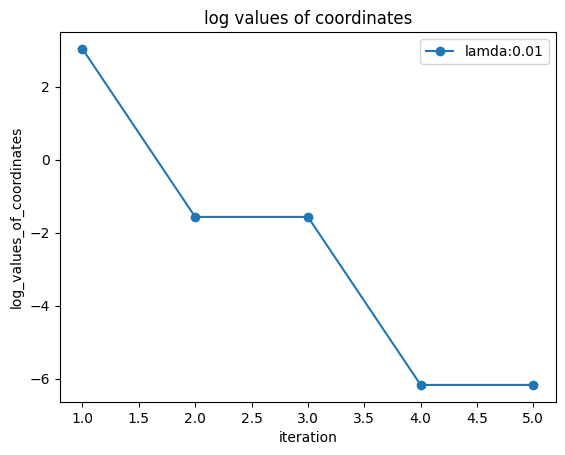

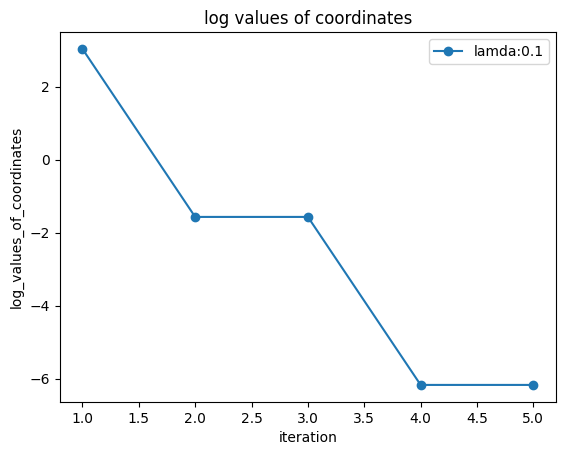

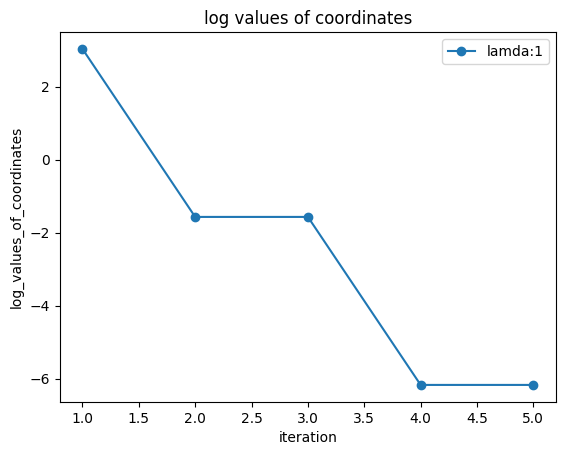

In [12]:
lamdalist = [1e-3,1e-2,1e-1,1]
for lamda in lamdalist:
  tau=1e-4
  x=[0 for i in range(10)]
  iteration_with_scale,optimal_value_with_scale,optimizers_with_scale,all_x_with_scale=newton_method_with_backtrack(x,A,y,tau,lamda)
  logvalues=[]
  for i in range(iteration_with_scale[0]):
    norm=np.linalg.norm(all_x_with_scale[i]-optimizers_with_scale)
    logvalues.append(np.log(norm))
  iter=[i+1 for i in range(iteration_with_scale[0])]
  plt.plot(iter,logvalues,marker='o',label=f'lamda:{lamda}')
  plt.legend()
  plt.title('log values of coordinates')
  plt.xlabel('iteration')
  plt.ylabel('log_values_of_coordinates')
  plt.show()

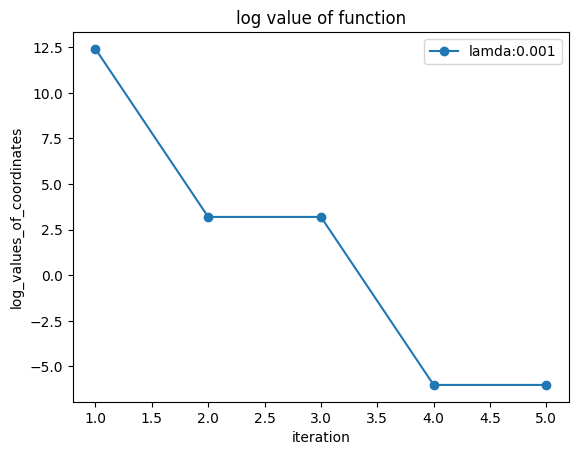

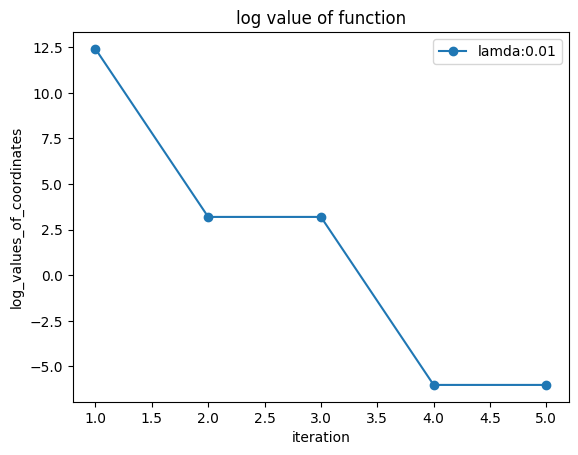

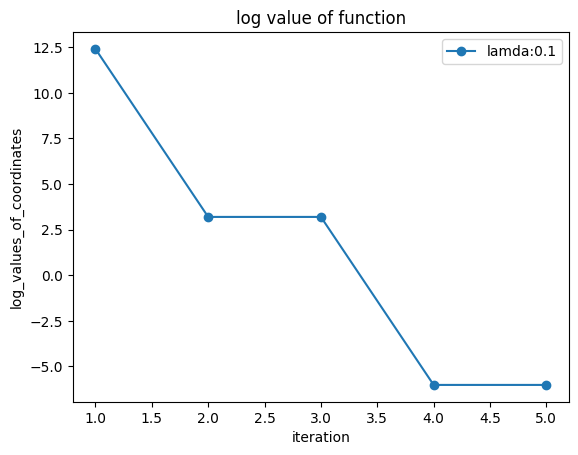

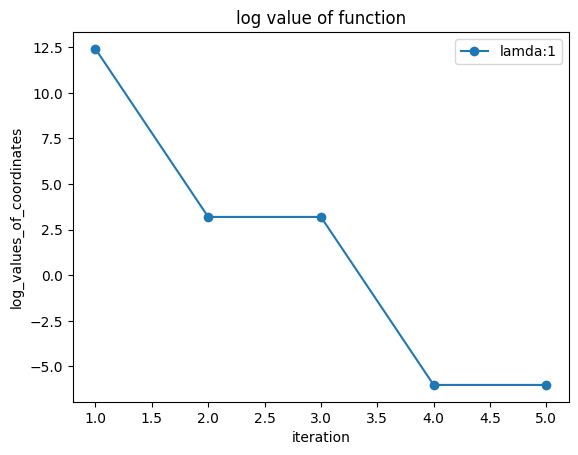

In [15]:
lamdalist = [1e-3,1e-2,1e-1,1]
for lamda in lamdalist:
  tau=1e-4
  x=[0 for i in range(10)]
  iteration_with_scale,optimal_value_with_scale,optimizers_with_scale,all_x_with_scale=newton_method_with_backtrack(x,A,y,tau,lamda)
  logvalues=[]
  for i in range(iteration_with_scale[0]):
    #print(f(all_x_with_scale[i],A,y))
    norm=abs(f(all_x_with_scale[i],A,y,lamda)-optimal_value_with_scale[0])
    logvalues.append(np.log(norm))
  iter=[i+1 for i in range(iteration_with_scale[0])]
  plt.plot(iter,logvalues,marker='o',label=f'lamda:{lamda}')
  plt.title('log value of function')
  plt.xlabel('iteration')
  plt.legend()
  plt.ylabel('log_values_of_coordinates')
  plt.show()

All of them converge equally on the different values of  λ , with iterations also being same (5) . So all observation for part we made here .

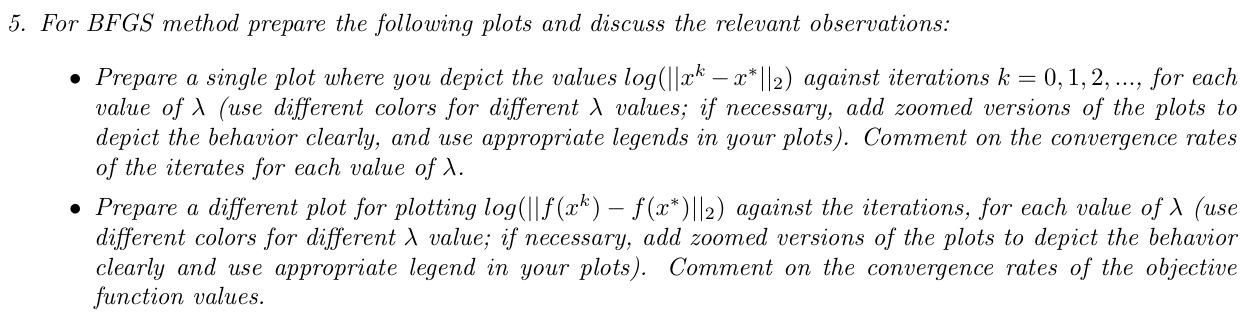

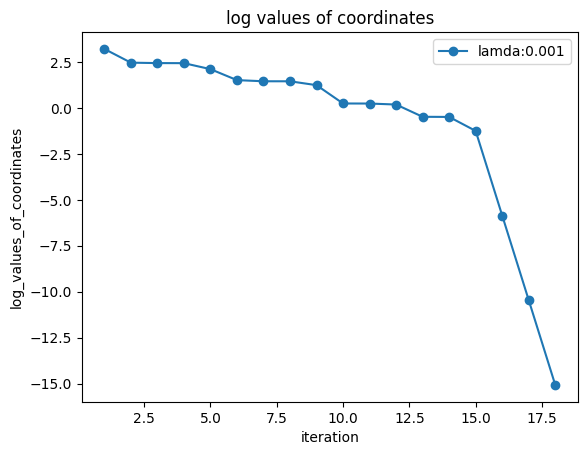

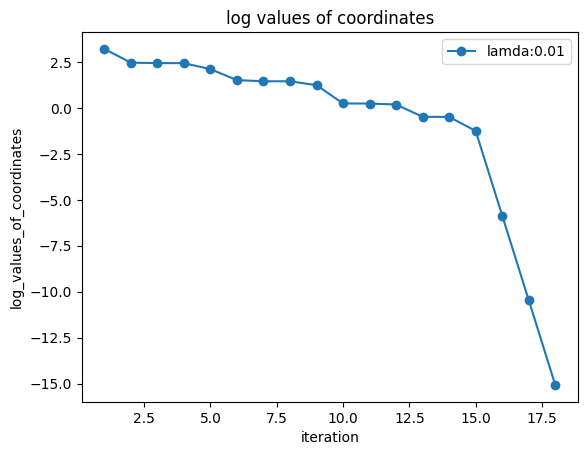

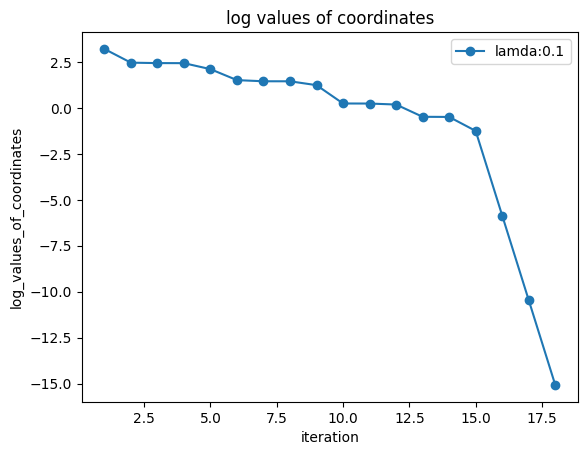

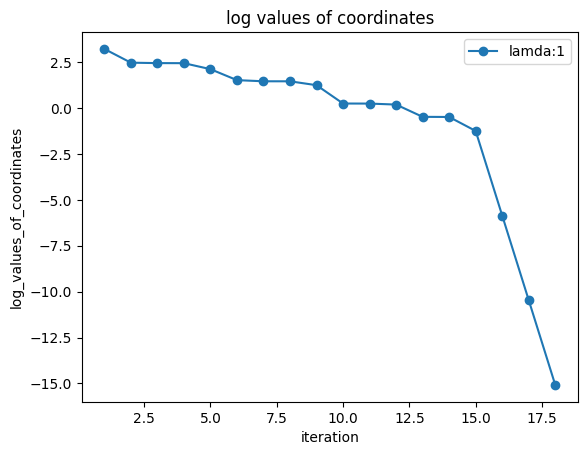

In [16]:
lamdalist = [1e-3,1e-2,1e-1,1]
for lamda in lamdalist:
  alpha0 = 0.99
  rho = 0.5
  gamma = 0.5
  tau=1e-5
  x0=[i for i in range(10)]
  iteration,minimizers,optimal,all_x=bfgs(x0,A,y,tau, alpha0, rho, gamma,lamda)
  logvalues=[]
  for i in range(iteration):
    norm=np.linalg.norm(all_x[i]-minimizers)
    logvalues.append(np.log(norm))
  iter=[i+1 for i in range(iteration)]
  plt.plot(iter,logvalues,marker='o',label=f'lamda:{lamda}')
  plt.title('log values of coordinates')
  plt.xlabel('iteration')
  plt.legend()
  plt.ylabel('log_values_of_coordinates')
  plt.show()

 We can observe that all of them converge equally on the different values of  λ , with iterations also being same (18)  So same observation for bfgs we made here same also.

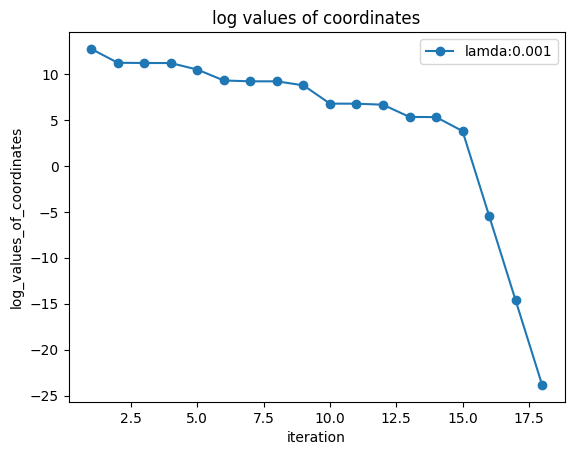

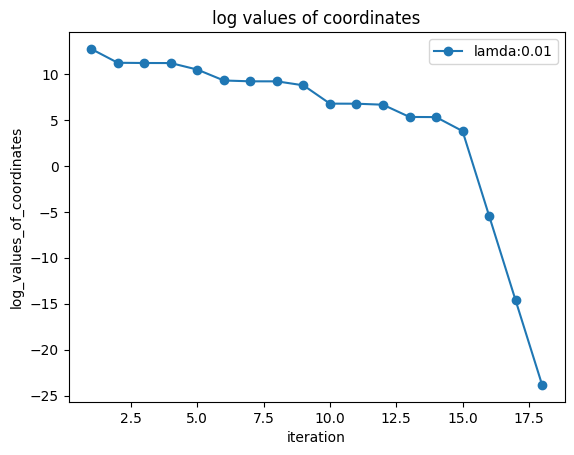

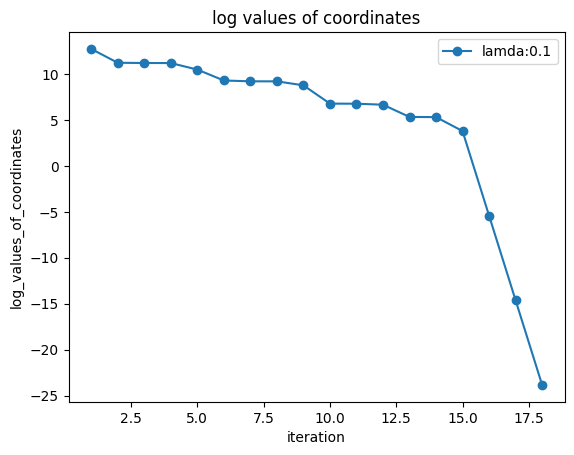

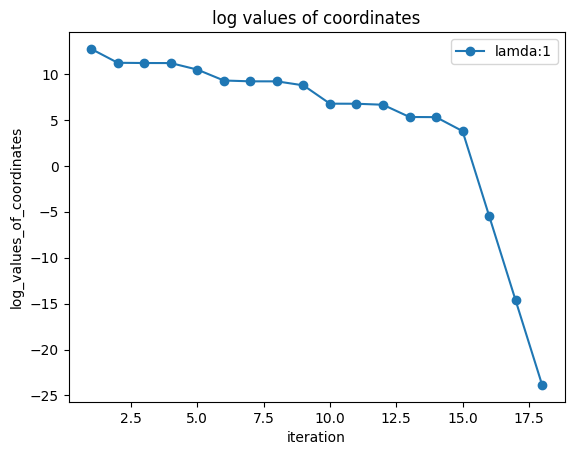

In [19]:
lamdalist = [1e-3,1e-2,1e-1,1]
for lamda in lamdalist:
  alpha0 = 0.99
  rho = 0.5
  gamma = 0.5
  tau=1e-5
  x0=[i for i in range(10)]
  iteration,minimizers,optimal,all_x=bfgs(x0,A,y,tau, alpha0, rho, gamma,lamda)
  logvalues=[]
  for i in range(iteration):
    #print(f(all_x_with_scale[i],A,y))
    norm=abs(f(all_x[i],A,y,lamda)-optimal)
    logvalues.append(np.log(norm))
  iter=[i+1 for i in range(iteration)]
  plt.plot(iter,logvalues,marker='o',label=f'lamda:{lamda}')
  plt.title('log values of coordinates')
  plt.xlabel('iteration')
  plt.legend()
  plt.ylabel('log_values_of_coordinates')
  plt.show()


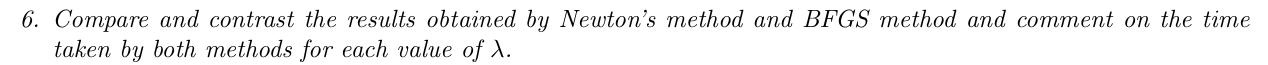

In [29]:
i = 0
for lamda in lamdalist:
  print(f"Time taken by Newton for lambda: {lamda} is: {newtontime_list[i]}")
  i+=1

Time taken by Newton for lambda: 0.001 is: 0.01060628890991211
Time taken by Newton for lambda: 0.01 is: 0.005662202835083008
Time taken by Newton for lambda: 0.1 is: 0.00854182243347168
Time taken by Newton for lambda: 1 is: 0.016051292419433594


In [31]:
i = 0
for lamda in lamdalist:
  print(f"Time taken by bfgs for lambda: {lamda} is: {bfgstime_list[i]}")
  i+=1

Time taken by bfgs for lambda: 0.001 is: 0.019841670989990234
Time taken by bfgs for lambda: 0.01 is: 0.021459341049194336
Time taken by bfgs for lambda: 0.1 is: 0.021457433700561523
Time taken by bfgs for lambda: 1 is: 0.02216339111328125


As we can observe for all lambdas, the Newton is faster from BFGS, approximately 10 times faster. Also the time for newton is improved by regularization


